In [71]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from IPython.display import display

# Leer archivo .txt como DataFrame
# Reemplaza 'fichajes.txt' con la ruta de tu archivo
archivo = 'fichadas.txt'
columnas = ['lugar_fichaje', 'fecha', 'Hora', 'tarjeta', 'legajo','nombre','fichaje','estado','null']

try:
    # Leer el archivo y asignar los nombres de las columnas
    df = pd.read_csv(archivo, sep=",", header=None, encoding='latin1', names=columnas)
    # Convertir la columna 'Fecha' a tipo datetime
    df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')  # Usa 'coerce' para manejar errores si es necesario

    print("Datos cargados:")
    display(df)
except UnicodeDecodeError:
    print("Error de codificación: Intenta con una codificación diferente.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{archivo}'. Verifica la ruta.")


   

Datos cargados:


,lugar_fichaje,fecha,Hora,tarjeta,legajo,nombre,fichaje,estado,null
0,9020,2025-01-01,00:29:36,1694,1694,LOPEZ ERICA PAOLA,40,V,0
1,9020,2025-01-01,00:29:49,1694,1694,LOPEZ ERICA PAOLA,41,V,0
2,9033,2025-01-01,00:42:47,10741,10741,FARINA CAROLINA,41,V,0
3,9033,2025-01-01,00:42:59,10500,10500,GONZALEZ DARIO ARIEL,41,V,0
4,9021,2025-01-01,01:18:18,1705,1705,RE SERGIO FABIAN,41,N,0
...,...,...,...,...,...,...,...,...,...
10868,9020,2025-01-15,08:21:32,1774,1774,RENZI MARIA BETANIA,41,V,0
10869,9021,2025-01-15,08:22:01,304740225,1795,"GROSSELLI, ANAHI ASUNCION",41,P,0
10870,9011,2025-01-15,08:25:14,304760879,10319,ARIAS MARCOS LUCAS,41,P,0
10871,9010,2025-01-15,08:26:40,1784,1784,MEDEL JUAN JOSE,41,N,0


In [72]:
print(df.isnull().sum())

print(df.dtypes)

lugar_fichaje     0
fecha             0
Hora              0
tarjeta           0
legajo            0
nombre           50
fichaje           0
estado            0
null              0
dtype: int64
lugar_fichaje             int64
fecha            datetime64[ns]
Hora                     object
tarjeta                   int64
legajo                    int64
nombre                   object
fichaje                   int64
estado                   object
null                      int64
dtype: object


In [73]:
filas_null = df[df['nombre'].isnull()]

# Mostrar las filas con valores nulos en la columna 'Nombre'
display(filas_null)
print(filas_null.count())

filas_m = df[df["estado"] == "M"]

display(filas_m)
print(filas_m.count())

,lugar_fichaje,fecha,Hora,tarjeta,legajo,nombre,fichaje,estado,null
235,9021,2025-01-02,05:54:11,65535,65535,NaN,41,M,0
313,9021,2025-01-02,06:16:43,65535,65535,NaN,41,M,0
800,9033,2025-01-02,14:00:49,1489,1489,NaN,41,N,0
1232,9021,2025-01-03,05:54:10,65535,65535,NaN,41,M,0
1258,9021,2025-01-03,06:36:58,5,5,NaN,41,N,0
1259,9021,2025-01-03,06:37:01,65535,65535,NaN,41,M,0
1270,9021,2025-01-03,06:44:06,251491817,251491817,NaN,41,N,0
2077,9025,2025-01-04,05:39:43,11,11,NaN,41,N,0
2143,9021,2025-01-04,05:59:15,65535,65535,NaN,41,M,0
2172,9021,2025-01-04,07:34:46,65535,65535,NaN,41,M,0


lugar_fichaje    50
fecha            50
Hora             50
tarjeta          50
legajo           50
nombre            0
fichaje          50
estado           50
null             50
dtype: int64


,lugar_fichaje,fecha,Hora,tarjeta,legajo,nombre,fichaje,estado,null
235,9021,2025-01-02,05:54:11,65535,65535,NaN,41,M,0
313,9021,2025-01-02,06:16:43,65535,65535,NaN,41,M,0
1232,9021,2025-01-03,05:54:10,65535,65535,NaN,41,M,0
1259,9021,2025-01-03,06:37:01,65535,65535,NaN,41,M,0
2143,9021,2025-01-04,05:59:15,65535,65535,NaN,41,M,0
2172,9021,2025-01-04,07:34:46,65535,65535,NaN,41,M,0
2640,9021,2025-01-06,05:55:10,65535,65535,NaN,41,M,0
2718,9021,2025-01-06,06:20:38,65535,65535,NaN,41,M,0
2936,9020,2025-01-06,07:44:35,65535,65535,NaN,41,M,0
3022,9010,2025-01-06,10:08:40,65535,65535,NaN,40,M,0


lugar_fichaje    31
fecha            31
Hora             31
tarjeta          31
legajo           31
nombre            0
fichaje          31
estado           31
null             31
dtype: int64


## El id 65535 presenta una anomalia con respecto a su entrada y respecto a la longitud de los digitos 


In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

df_preparacion = df.copy()

df_preparacion['fecha'] = pd.to_datetime(df_preparacion['fecha'], errors='coerce')

# Combinar 'fecha' y 'hora' en una sola columna de tipo datetime
df_preparacion['FechaHora'] = pd.to_datetime(df_preparacion['fecha'].astype(str) + ' ' + df_preparacion['Hora'].astype(str), errors='coerce')

# Eliminar la columna 'nombre' ya que 'legajo' es suficiente para identificar a las personas
df_preparacion = df_preparacion.drop(columns=['nombre', "null"])

df_preparacion['legajo_original'] = df_preparacion['legajo']
df_preparacion['lugar_original'] = df_preparacion['lugar_fichaje']

# Convertir las columnas categóricas a números con LabelEncoder
label_columns = ['lugar_fichaje', 'tarjeta', 'legajo', 'estado']
encoder = LabelEncoder()

for col in label_columns:
    df_preparacion[col] = encoder.fit_transform(df_preparacion[col].fillna("Desconocido"))  # Llenar nulos con una categoría adicional

# Eliminar la columna 'fecha' y 'hora' si no se van a usar más
df_preparacion = df_preparacion.drop(columns=['fecha', 'Hora'])

# Mostrar los datos procesados
display(df_preparacion.head())

,lugar_fichaje,tarjeta,legajo,fichaje,estado,FechaHora,legajo_original,lugar_original
0,3,150,277,40,3,2025-01-01 00:29:36,1694,9020
1,3,150,277,41,3,2025-01-01 00:29:49,1694,9020
2,13,307,511,41,3,2025-01-01 00:42:47,10741,9033
3,13,260,431,41,3,2025-01-01 00:42:59,10500,9033
4,4,155,282,41,1,2025-01-01 01:18:18,1705,9021


In [75]:
model = IsolationForest(contamination=0.05)  # 5% de los datos se espera que sean anómalos

# Seleccionar las características numéricas para el modelo (sin la columna 'nombre')
X = df_preparacion[['lugar_fichaje', 'legajo', 'estado']]  # Usar solo las características relevantes

# Ajustar el modelo a los datos
model.fit(X)

# Predecir las anomalías (1 = normal, -1 = anómalo)
df_preparacion['Anomalia'] = model.predict(X)

# Mostrar las filas que se consideran anómalas
anomalos = df_preparacion[df_preparacion['Anomalia'] == -1]
print("Anomalías detectadas:")
print(anomalos)

Anomalías detectadas:
       lugar_fichaje  tarjeta  legajo  fichaje  estado           FechaHora  \
29                13      333     541       41       1 2025-01-01 06:53:45   
30                13      333     541       41       1 2025-01-01 06:54:07   
34                14      155     282       40       1 2025-01-01 07:35:44   
94                13      333     541       40       1 2025-01-01 15:08:15   
175               14      228     389       41       1 2025-01-02 05:31:02   
...              ...      ...     ...      ...     ...                 ...   
10855             12      295     498       41       1 2025-01-15 08:04:18   
10857             14      222     379       41       1 2025-01-15 08:07:14   
10863             15      205     359       41       3 2025-01-15 08:12:29   
10871              0      184     328       41       1 2025-01-15 08:26:40   
10872              0      184     328       41       3 2025-01-15 08:27:02   

       legajo_original  lugar_original  A

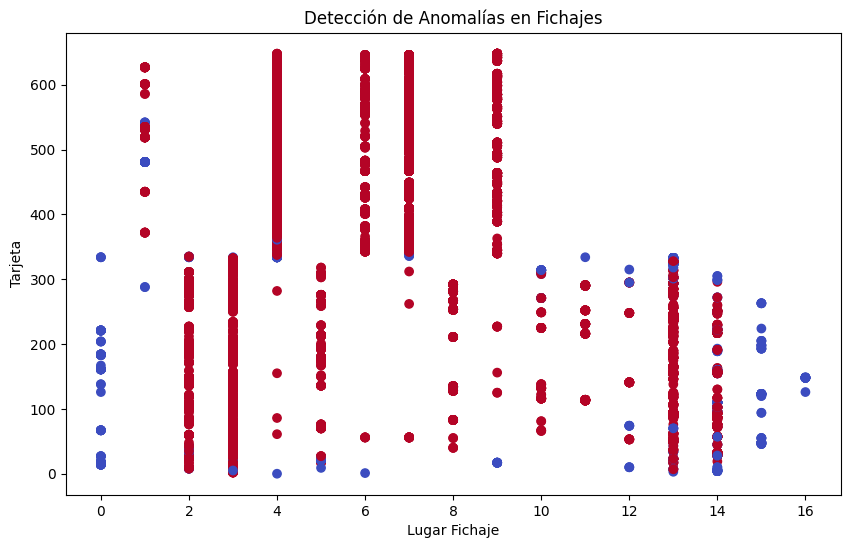

In [76]:
plt.figure(figsize=(10, 6))

# Mostrar los puntos normales y anómalos
plt.scatter(df_preparacion['lugar_fichaje'], df_preparacion['tarjeta'], c=df_preparacion['Anomalia'], cmap='coolwarm', label='Fichajes')
plt.title('Detección de Anomalías en Fichajes')
plt.xlabel('Lugar Fichaje')
plt.ylabel('Tarjeta')
plt.show()

In [77]:
display(anomalos)

,lugar_fichaje,tarjeta,legajo,fichaje,estado,FechaHora,legajo_original,lugar_original,Anomalia
29,13,333,541,41,1,2025-01-01 06:53:45,10818,9033,-1
30,13,333,541,41,1,2025-01-01 06:54:07,10818,9033,-1
34,14,155,282,40,1,2025-01-01 07:35:44,1705,9034,-1
94,13,333,541,40,1,2025-01-01 15:08:15,10818,9033,-1
175,14,228,389,41,1,2025-01-02 05:31:02,10243,9034,-1
...,...,...,...,...,...,...,...,...,...
10855,12,295,498,41,1,2025-01-15 08:04:18,10707,9031,-1
10857,14,222,379,41,1,2025-01-15 08:07:14,10151,9034,-1
10863,15,205,359,41,3,2025-01-15 08:12:29,9929,9035,-1
10871,0,184,328,41,1,2025-01-15 08:26:40,1784,9010,-1


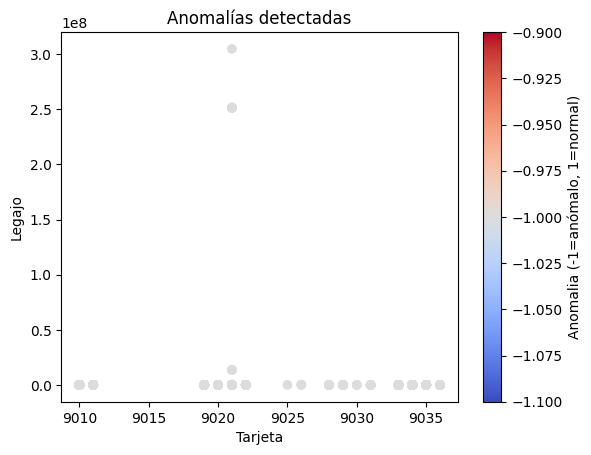

In [78]:
import matplotlib.pyplot as plt

# Suponiendo que tienes algunas columnas numéricas como 'tarjeta' y 'legajo'
plt.scatter(anomalos['lugar_original'], anomalos['legajo_original'], c=anomalos['Anomalia'], cmap='coolwarm', marker='o')
plt.xlabel('Tarjeta')
plt.ylabel('Legajo')
plt.title('Anomalías detectadas')
plt.colorbar(label='Anomalia (-1=anómalo, 1=normal)')
plt.show()

In [79]:
legajos_altos = df[df["legajo"] > 10820]

# Eliminar duplicados, pero manteniendo las demás columnas intactas
legajos_altos_unicos = legajos_altos.drop_duplicates(subset=["legajo"])

# Mostrar la tabla con los legajos altos únicos
display(legajos_altos_unicos)

,lugar_fichaje,fecha,Hora,tarjeta,legajo,nombre,fichaje,estado,null
235,9021,2025-01-02,05:54:11,65535,65535,NaN,41,M,0
1270,9021,2025-01-03,06:44:06,251491817,251491817,NaN,41,N,0
2675,9026,2025-01-06,06:00:18,110675,110675,NaN,41,N,0
5129,9019,2025-01-08,08:01:59,100008,100008,STECCHINA ALCIDES RICARDO,41,V,0
5596,9021,2025-01-08,15:31:58,304759553,304759553,NaN,40,N,0
10229,9021,2025-01-14,15:11:49,13609796,13609796,NaN,40,N,0
10449,9026,2025-01-15,05:36:17,110753,110753,NaN,41,N,0


## La tabla de arriba indican los usuarios que no tienen legajo

In [80]:
grupo_lugar = anomalos.groupby('lugar_original')['legajo_original'].apply(list)
grupo_lugar = anomalos.groupby('lugar_original')['legajo_original'].count()

print(grupo_lugar)

transito = anomalos[anomalos["lugar_original"] == 9034]

conteo_legajos_transito = transito.groupby('legajo_original').size()

# Mostrar los resultados
display(conteo_legajos_transito)

lugar_original
9010     86
9011     25
9019     48
9020     11
9021     36
9022     29
9025      1
9026      3
9028      9
9029     19
9030      3
9031     10
9033     92
9034    105
9035     53
9036     13
Name: legajo_original, dtype: int64


legajo_original
678      10
983       7
1040      2
1113      8
1194      2
1273      1
1353      2
1413      1
1500      3
1503      1
1513      2
1529     27
1705      6
1708      1
1712      1
1720      8
1798      4
1804      2
1807      1
10151     5
10167     1
10243     1
10424     2
10568     2
10715     3
10739     2
dtype: int64

### PREPARACION DE LOS DATOS PARA APLICACION DE ALGORIMOS


In [81]:
import pandas as pd

# Asegúrate de que 'fecha' y 'Hora' están combinados para crear una columna 'fecha_hora'
df['fecha_hora'] = pd.to_datetime(df['fecha'].astype(str) + ' ' + df['Hora'])

# Agrupar por lugar de fichaje
lugares_fichaje = df.groupby('lugar_fichaje')

# Crear un DataFrame vacío para almacenar anomalías
anomalias_fichaje = pd.DataFrame()

# Iterar sobre cada grupo de lugar
for lugar, group in lugares_fichaje:
    # Ordenar los datos por 'fecha_hora'
    group = group.sort_values('fecha_hora')

    # Calcular la diferencia en segundos entre fichajes consecutivos
    group['diferencia_segundos_anterior'] = group['fecha_hora'].diff().dt.total_seconds()
    group['diferencia_segundos_siguiente'] = group['fecha_hora'].shift(-1).diff().dt.total_seconds()

    # Identificar anomalías: diferencia menor a 10 segundos con el anterior o siguiente
    anomalos_lugar = group[(group['diferencia_segundos_anterior'] < 2) | (group['diferencia_segundos_siguiente'] < 2)]
    
    # Agregar estas anomalías al DataFrame final
    anomalias_fichaje = pd.concat([anomalias_fichaje, anomalos_lugar])

anomalias_fichaje = anomalias_fichaje.drop(["fecha", "Hora", "null"], axis=1)

# Mostrar el DataFrame final de anomalías
display(anomalias_fichaje)


,lugar_fichaje,tarjeta,legajo,nombre,fichaje,estado,fecha_hora,diferencia_segundos_anterior,diferencia_segundos_siguiente
762,9011,304717936,1207,SODERO ANALIA LAURA,40,P,2025-01-02 14:00:02,4067.0,1.0
764,9011,251558372,10560,GIOBELLINA RITA CAROLINA SOLEDAD,40,P,2025-01-02 14:00:03,1.0,4.0
1531,9011,304751932,987,SOSA SEBASTIAN EDUARDO,41,P,2025-01-03 12:31:21,15306.0,1.0
1532,9011,304751932,987,SOSA SEBASTIAN EDUARDO,41,P,2025-01-03 12:31:22,1.0,5321.0
3244,9011,251558372,10560,GIOBELLINA RITA CAROLINA SOLEDAD,40,P,2025-01-06 14:01:10,29.0,1.0
...,...,...,...,...,...,...,...,...,...
8184,9028,304727982,10741,FARINA CAROLINA,41,P,2025-01-11 23:01:11,1.0,7.0
8252,9028,304727982,10741,FARINA CAROLINA,40,P,2025-01-12 08:08:14,4.0,1.0
8253,9028,251528602,1491,CABRAL LEONARDO FABIO,40,P,2025-01-12 08:08:15,1.0,192.0
9383,9028,251548319,10283,JUNCOS NAHUEL MIGUEL,40,P,2025-01-13 23:01:30,139.0,1.0


In [82]:

anteriores = []
posteriores = []

for index in anomalias_fichaje.index:
   
    if index - 1 >= 0:  
        anterior = df.loc[index - 1, ['legajo', 'fecha_hora']]  
    else:
        anterior = None  # Si no hay anterior (primer registro)

    
    if index + 1 < len(df): 
        posterior = df.loc[index + 1, ['legajo', 'fecha_hora']]  
    else:
        posterior = None  

    anteriores.append(anterior)
    posteriores.append(posterior)


df_anteriores = pd.DataFrame(anteriores)
df_posteriores = pd.DataFrame(posteriores)


df_anteriores = df_anteriores.reset_index(drop=True)
df_posteriores = df_posteriores.reset_index(drop=True)


anomalias_fichaje['anterior'] = df_anteriores['fecha_hora']  
anomalias_fichaje['posterior'] = df_posteriores['fecha_hora'] 





### APLICACION DE ALGORITMO ISOLATIONFOREST PARA DETECTAR ANOMALIAS

In [103]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Función para crear registros previos y posteriores
def generar_registros(df, anomalias_fichaje):
    registros = []
    for index in anomalias_fichaje.index:
        # Validar existencia de filas anteriores y posteriores
        anterior = df.loc[index - 1] if index - 1 in df.index else None
        posterior = df.loc[index + 1] if index + 1 in df.index else None

        if anterior is not None and posterior is not None:
            registros.append({
                'lugar_fichaje': df.loc[index]['lugar_fichaje'],
                'legajo_anterior': anterior['legajo'],
                'fecha_anterior': anterior['fecha_hora'],
                'legajo_actual': df.loc[index]['legajo'],
                'fecha_actual': df.loc[index]['fecha_hora'],
                'legajo_posterior': posterior['legajo'],
                'fecha_posterior': posterior['fecha_hora']
            })
    return pd.DataFrame(registros)


# Función para limpiar filas con legajos duplicados
def limpiar_legajos_duplicados(df):
    # Eliminar filas donde los legajos sean iguales
    filtro = (
        (df['legajo_anterior'] != df['legajo_actual']) & 
        (df['legajo_actual'] != df['legajo_posterior'])
    )
    return df[filtro]


# Función para preprocesar las fechas a timestamp
def convertir_fechas_a_timestamps(df, columnas):
    for col in columnas:
        df[col] = pd.to_datetime(df[col]).astype(int) / 10**9
    return df


# Función para entrenar y aplicar el modelo de Isolation Forest
def detectar_anomalias(df, columnas, contamination=0.8):
    model = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
    df['anomalia'] = model.fit_predict(df[columnas])
    return df




# Generar registros previos, actuales y posteriores
df_completo = generar_registros(df, anomalias_fichaje)
df_completo_raw = df_completo.copy()

# Limpiar filas con legajos duplicados
df_completo = limpiar_legajos_duplicados(df_completo)

# Mostrar DataFrame limpio
print("DataFrame después de limpiar duplicados:")
display(df_completo)

# Preprocesar las fechas
columnas_fechas = ['fecha_anterior', 'fecha_actual', 'fecha_posterior']
df_completo = convertir_fechas_a_timestamps(df_completo, columnas_fechas)

# Detectar anomalías
df_completo = detectar_anomalias(df_completo, columnas_fechas, contamination= 0.1 )

# Mostrar el resultado con anomalías
print("DataFrame con anomalías detectadas:")
display(df_completo)


DataFrame después de limpiar duplicados:


,lugar_fichaje,legajo_anterior,fecha_anterior,legajo_actual,fecha_actual,legajo_posterior,fecha_posterior
0,9011,10787,2025-01-02 13:59:56,1207,2025-01-02 14:00:02,1195,2025-01-02 14:00:02
1,9011,1195,2025-01-02 14:00:02,10560,2025-01-02 14:00:03,1132,2025-01-02 14:00:03
4,9011,10662,2025-01-06 14:01:02,10560,2025-01-06 14:01:10,1207,2025-01-06 14:01:11
5,9011,10560,2025-01-06 14:01:10,1207,2025-01-06 14:01:11,10254,2025-01-06 14:01:14
6,9011,10322,2025-01-08 14:01:22,10560,2025-01-08 14:01:28,1207,2025-01-08 14:01:29
...,...,...,...,...,...,...,...
2222,9026,10430,2025-01-15 05:56:41,1449,2025-01-15 05:56:41,10531,2025-01-15 05:57:01
2251,9028,10240,2025-01-07 07:10:48,10744,2025-01-07 07:10:54,10741,2025-01-07 07:10:55
2252,9028,10744,2025-01-07 07:10:54,10741,2025-01-07 07:10:55,1072,2025-01-07 07:11:08
2259,9028,1151,2025-01-12 08:08:10,10741,2025-01-12 08:08:14,1491,2025-01-12 08:08:15


DataFrame con anomalías detectadas:


,lugar_fichaje,legajo_anterior,fecha_anterior,legajo_actual,fecha_actual,legajo_posterior,fecha_posterior,anomalia
0,9011,10787,1.735826e+09,1207,1.735826e+09,1195,1.735826e+09,1
1,9011,1195,1.735826e+09,10560,1.735826e+09,1132,1.735826e+09,1
4,9011,10662,1.736172e+09,10560,1.736172e+09,1207,1.736172e+09,1
5,9011,10560,1.736172e+09,1207,1.736172e+09,10254,1.736172e+09,1
6,9011,10322,1.736345e+09,10560,1.736345e+09,1207,1.736345e+09,1
...,...,...,...,...,...,...,...,...
2222,9026,10430,1.736921e+09,1449,1.736921e+09,10531,1.736921e+09,1
2251,9028,10240,1.736234e+09,10744,1.736234e+09,10741,1.736234e+09,1
2252,9028,10744,1.736234e+09,10741,1.736234e+09,1072,1.736234e+09,1
2259,9028,1151,1.736669e+09,10741,1.736669e+09,1491,1.736669e+09,-1


In [84]:
# anomalias_fichaje['prediccion'] = model.predict(X)  # Aquí 'X' es tu conjunto de datos, y 'modelo' es tu objeto IsolationForest

# Filtrar las anomalías (donde la predicción es -1)
datos_anomalos = df_completo[df_completo['anomalia'] == -1]
datos_anomalos['fecha_anterior'] = pd.to_datetime(datos_anomalos['fecha_anterior'], unit='s')
datos_anomalos['fecha_actual'] = pd.to_datetime(datos_anomalos['fecha_actual'], unit='s')
datos_anomalos['fecha_posterior'] = pd.to_datetime(datos_anomalos['fecha_posterior'], unit='s')



# Mostrar las anomalías
display(datos_anomalos)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12840\3133307679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_anomalos['fecha_anterior'] = pd.to_datetime(datos_anomalos['fecha_anterior'], unit='s')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12840\3133307679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_anomalos['fecha_actual'] = pd.to_datetime(datos_anomalos['fecha_actual'], unit='s')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12840\3133307679.py:7: SettingWithCopyWarning: 
A va

,lugar_fichaje,legajo_anterior,fecha_anterior,legajo_actual,fecha_actual,legajo_posterior,fecha_posterior,anomalia
24,9021,1748,2025-01-02 06:55:56,1760,2025-01-02 06:55:57,1057,2025-01-02 06:56:06,-1
31,9021,10738,2025-01-03 14:42:26,9985,2025-01-03 14:42:27,1437,2025-01-03 14:42:28,-1
32,9021,9985,2025-01-03 14:42:27,1437,2025-01-03 14:42:28,10741,2025-01-03 14:42:38,-1
105,9021,1748,2025-01-15 07:05:48,1760,2025-01-15 07:05:49,1311,2025-01-15 07:06:14,-1
172,9025,1273,2025-01-04 05:57:58,1476,2025-01-04 05:57:59,10230,2025-01-04 05:57:59,-1
173,9025,10230,2025-01-04 05:57:59,1476,2025-01-04 05:58:00,1072,2025-01-04 05:58:05,-1
327,9026,65535,2025-01-02 05:54:11,10513,2025-01-02 05:54:11,10666,2025-01-02 05:54:15,-1
332,9026,10656,2025-01-02 05:54:36,10538,2025-01-02 05:54:37,1658,2025-01-02 05:54:40,-1
378,9026,10537,2025-01-02 13:00:32,1464,2025-01-02 13:00:33,10430,2025-01-02 13:00:37,-1
397,9026,10670,2025-01-02 13:01:19,10534,2025-01-02 13:01:20,1659,2025-01-02 13:01:27,-1


In [85]:


# Filtrar para eliminar los registros donde el 'legajo_actual' es igual al anterior o posterior
datos_limpios = datos_anomalos[~((datos_anomalos['legajo_actual'] == datos_anomalos['legajo_anterior']) | 
                                 (datos_anomalos['legajo_actual'] == datos_anomalos['legajo_posterior']))]

# Mostrar el DataFrame limpio con las columnas 'legajo_anterior' y 'legajo_posterior' aún presentes
display(datos_limpios)
datos_limpios.to_csv('anomalias_mas_copadas', index=False)


,lugar_fichaje,legajo_anterior,fecha_anterior,legajo_actual,fecha_actual,legajo_posterior,fecha_posterior,anomalia
24,9021,1748,2025-01-02 06:55:56,1760,2025-01-02 06:55:57,1057,2025-01-02 06:56:06,-1
31,9021,10738,2025-01-03 14:42:26,9985,2025-01-03 14:42:27,1437,2025-01-03 14:42:28,-1
32,9021,9985,2025-01-03 14:42:27,1437,2025-01-03 14:42:28,10741,2025-01-03 14:42:38,-1
105,9021,1748,2025-01-15 07:05:48,1760,2025-01-15 07:05:49,1311,2025-01-15 07:06:14,-1
172,9025,1273,2025-01-04 05:57:58,1476,2025-01-04 05:57:59,10230,2025-01-04 05:57:59,-1
173,9025,10230,2025-01-04 05:57:59,1476,2025-01-04 05:58:00,1072,2025-01-04 05:58:05,-1
327,9026,65535,2025-01-02 05:54:11,10513,2025-01-02 05:54:11,10666,2025-01-02 05:54:15,-1
332,9026,10656,2025-01-02 05:54:36,10538,2025-01-02 05:54:37,1658,2025-01-02 05:54:40,-1
378,9026,10537,2025-01-02 13:00:32,1464,2025-01-02 13:00:33,10430,2025-01-02 13:00:37,-1
397,9026,10670,2025-01-02 13:01:19,10534,2025-01-02 13:01:20,1659,2025-01-02 13:01:27,-1


### DELTA ENTRE LOS HORARIOS Y PATRONES ENCONTRADOS DE ACUERDO A LA DIFERENCIA HORARIA ENTRE FICHAJES


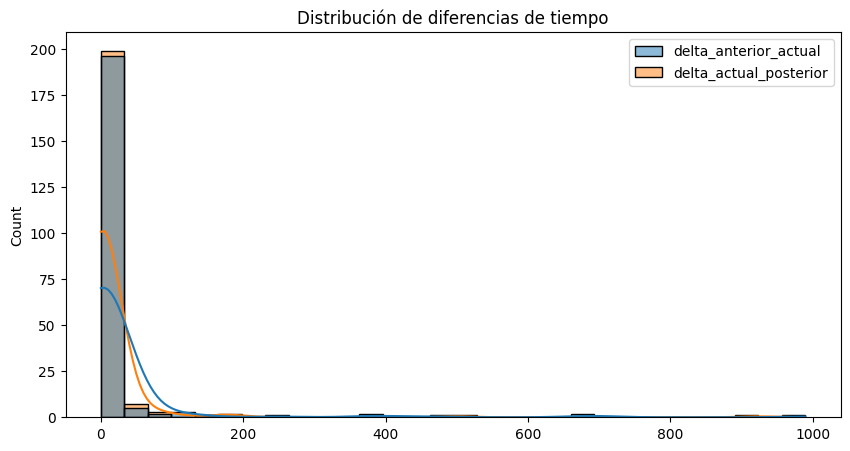

legajo_anterior  legajo_actual  legajo_posterior
10409            10753          1272                4
10230            10435          10230               2
393              10409          10753               2
18               10702          1416                1
39               10753          10409               1
645              9917           10670               1
                 10625          1230                1
393              1633           1730                1
645              1461           987                 1
1082             1590           1525                1
dtype: int64


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diferencias de tiempo
df_completo['delta_anterior_actual'] = df_completo['fecha_actual'] - df_completo['fecha_anterior']
df_completo['delta_actual_posterior'] = df_completo['fecha_posterior'] - df_completo['fecha_actual']

# Histograma de diferencias de tiempo
plt.figure(figsize=(10, 5))
sns.histplot(df_completo[['delta_anterior_actual', 'delta_actual_posterior']], kde=True, bins=30)
plt.title('Distribución de diferencias de tiempo')
plt.show()

# Análisis de combinaciones de legajosd
patrones_legajos = df_completo.groupby(['legajo_anterior', 'legajo_actual', 'legajo_posterior']).size()
print(patrones_legajos.sort_values(ascending=False).head(10))  # Patrones más comunes


### APLICACION DE ALGORITMO DE CLUSTERIZACION DBSCAN PARA DETECCION DE ANOMALIAS


In [88]:
from sklearn.cluster import DBSCAN

def detectar_anomalias_dbscan(df, columnas, eps=0.1, min_samples=5):
    # Aplicar DBSCAN
    model = DBSCAN(eps=eps, min_samples=min_samples)
    df['anomalia'] = model.fit_predict(df[columnas])  # Los puntos etiquetados como -1 son anomalías (ruido)
    return df



# Generar registros previos, actuales y posteriores
df_completo = generar_registros(df, anomalias_fichaje)

print(df_completo.size)

# Limpiar filas con legajos duplicados
df_completo = limpiar_legajos_duplicados(df_completo)
print(df_completo.size)
# Preprocesar las fechas
columnas_fechas = ['fecha_anterior', 'fecha_actual', 'fecha_posterior']
df_completo = convertir_fechas_a_timestamps(df_completo, columnas_fechas)

# Detectar anomalías usando DBSCAN
df_completo = detectar_anomalias_dbscan(df_completo, columnas_fechas, eps=4, min_samples=20)

# Mostrar el resultado con anomalías detectadas
print("DataFrame con anomalías detectadas (DBSCAN):")
display(df_completo)

15841
1498
DataFrame con anomalías detectadas (DBSCAN):


,lugar_fichaje,legajo_anterior,fecha_anterior,legajo_actual,fecha_actual,legajo_posterior,fecha_posterior,anomalia
0,9011,10787,1.735826e+09,1207,1.735826e+09,1195,1.735826e+09,-1
1,9011,1195,1.735826e+09,10560,1.735826e+09,1132,1.735826e+09,-1
4,9011,10662,1.736172e+09,10560,1.736172e+09,1207,1.736172e+09,-1
5,9011,10560,1.736172e+09,1207,1.736172e+09,10254,1.736172e+09,-1
6,9011,10322,1.736345e+09,10560,1.736345e+09,1207,1.736345e+09,-1
...,...,...,...,...,...,...,...,...
2222,9026,10430,1.736921e+09,1449,1.736921e+09,10531,1.736921e+09,-1
2251,9028,10240,1.736234e+09,10744,1.736234e+09,10741,1.736234e+09,-1
2252,9028,10744,1.736234e+09,10741,1.736234e+09,1072,1.736234e+09,-1
2259,9028,1151,1.736669e+09,10741,1.736669e+09,1491,1.736669e+09,-1


In [89]:
patrones_legajos = df_completo.groupby(['legajo_anterior', 'legajo_actual', 'legajo_posterior']).size()
display(patrones_legajos.sort_values(ascending=False).head(10))  # Patrones más comunes


legajo_anterior  legajo_actual  legajo_posterior
10409            10753          1272                4
10230            10435          10230               2
393              10409          10753               2
18               10702          1416                1
39               10753          10409               1
645              9917           10670               1
                 10625          1230                1
393              1633           1730                1
645              1461           987                 1
1082             1590           1525                1
dtype: int64

,lugar_fichaje,legajo_anterior,fecha_anterior,legajo_actual,fecha_actual,legajo_posterior,fecha_posterior
214,9025,10409,2025-01-07 05:36:30,10753,2025-01-07 05:36:31,1272,2025-01-07 05:36:36
251,9025,10409,2025-01-08 05:31:03,10753,2025-01-08 05:31:04,1272,2025-01-08 05:31:09
1364,9026,10409,2025-01-09 15:32:06,10753,2025-01-09 15:32:07,1095,2025-01-09 15:32:09
1398,9026,10409,2025-01-10 05:24:43,10753,2025-01-10 05:24:44,1272,2025-01-10 05:24:50
1578,9026,10409,2025-01-10 16:24:19,10753,2025-01-10 16:24:20,1729,2025-01-10 16:27:13
1733,9026,39,2025-01-13 05:30:06,10753,2025-01-13 05:34:16,10409,2025-01-13 05:34:17
1922,9026,1131,2025-01-13 15:09:41,10753,2025-01-13 15:11:27,10409,2025-01-13 15:11:28
1971,9026,1135,2025-01-14 05:29:52,10753,2025-01-14 05:32:07,10409,2025-01-14 05:32:08
2183,9026,10409,2025-01-15 05:28:42,10753,2025-01-15 05:28:43,1272,2025-01-15 05:29:06


,lugar_fichaje,legajo_anterior,fecha_anterior,legajo_actual,fecha_actual,legajo_posterior,fecha_posterior
198,9025,10230,2025-01-06 06:06:55,10435,2025-01-06 06:06:56,10230,2025-01-06 06:06:56
199,9025,10230,2025-01-06 06:06:56,10435,2025-01-06 06:06:57,10230,2025-01-06 06:06:57
219,9025,10628,2025-01-07 05:55:29,10435,2025-01-07 05:55:30,10435,2025-01-07 05:55:31
220,9025,10435,2025-01-07 05:55:30,10435,2025-01-07 05:55:31,1572,2025-01-07 05:55:37
530,9026,10677,2025-01-03 13:03:14,10435,2025-01-03 13:03:30,10435,2025-01-03 13:03:31
531,9026,10435,2025-01-03 13:03:30,10435,2025-01-03 13:03:31,10435,2025-01-03 13:03:32
532,9026,10435,2025-01-03 13:03:31,10435,2025-01-03 13:03:32,1152,2025-01-03 13:03:53
637,9026,10679,2025-01-04 13:00:42,10435,2025-01-04 13:00:43,10435,2025-01-04 13:00:45
932,9026,1172,2025-01-07 13:02:19,10435,2025-01-07 13:02:21,10435,2025-01-07 13:02:22
933,9026,10435,2025-01-07 13:02:21,10435,2025-01-07 13:02:22,1230,2025-01-07 13:02:38
